In [8]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import constants as c, units as u
from astropy import cosmology
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from matplotlib.patches import Rectangle
import seaborn as sns
from astropy.io import ascii
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from astropy.stats import sigma_clip
from collections import OrderedDict

sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
fontsize = 12
plt.rc("font", **{"family": "sans-serif", "serif": ["Arial"]})
plt.rc("xtick", labelsize=fontsize)
plt.rc("ytick", labelsize=fontsize)

files = ("J1059_tworegionspectra.dat","J1059_tworegions_norm.dat")
title = ('Blue region','Red region')
ap0color = "blue"
ap1color = "red"

rlines = OrderedDict(eval((open('rlines.txt','r')).read()))
glines = OrderedDict(eval((open('glines.txt','r')).read()))
tlines = OrderedDict(eval((open('tlines.txt','r')).read()))

In [9]:
abslines = OrderedDict(
    [
        ("SiIIa", 1260.4221),
        ("OI", 1302.1685),
        ("SiIIb", 1304.3702),
        ("CII", 1334.5323),
        ('ClI_1335', 1335.7258),
        ('SiIV_1393', 1393.7550),
        ('SiIV_1402', 1402.77)])
abslines1 = OrderedDict([
                        
                        ('SII_1259', 1259.519),
                        ('SiII_1260', 1260.4221),
                        ('OI_1302', 1302.1685),
                        ('SiII_1304', 1304.3702),
                        ('NiII_1317', 1317.217),
                        ('CII_1334', 1334.5323),
                        ('NiII_1370', 1370.132),
                        ('SiIV_1393', 1393.7550),
                        ('SiIV_1402', 1402.77),])
bluelines = OrderedDict(
    [
        ("CIII", 977),
        ("OI", 989),
        ("CII", 1036),
        ("SIVFeII", 1063),
        ("FeII", 1122),
        ("FeIIb", 1143),
        ("CIIIb", 1176),
        ("SiIIa", 1190),
        ("SiIIb", 1193),
        ("SiIII", 1207),])

lymanlinelist = [1215.7, 1025.7, 972.54, 949.74, 937.80]
foreground_lymanlines = np.array(lymanlinelist) * 3.3865 / 3.79

In [10]:
def plot_lines(ax1,ax2,ax3,pos,label=None):
    for line in rlines.items():
        ax1.axvline(line[1], linestyle=":", color="red", lw=1)
        ax2.axvline(line[1], linestyle=":", color="red", lw=1)
        ax3.axvline(line[1], linestyle=":", color="red", lw=1)

    for line in glines.values():
        ax1.axvline(line, linestyle=":", color="green", lw=1)
        ax2.axvline(line, linestyle=":", color="green", lw=1)
        ax3.axvline(line, linestyle=":", color="green", lw=1)
    for line in tlines.items():
        ax1.axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax2.axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax3.axvline(line[1], linestyle=":", color="indigo", lw=1)

    if label=='y':
        for label in rlines.items():
            ax1.text(label[1],pos, label[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
            ax2.text(label[1],pos, label[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
            ax3.text(label[1],pos, label[0],color="red",rotation=90, verticalalignment='center',clip_on=True)

        for label in glines.items():
            ax1.text(label[1],pos, label[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
            ax2.text(label[1],pos, label[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
            ax3.text(label[1],pos, label[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
        
        for label in tlines.items():
            ax1.text(label[1],pos, label[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)
            ax2.text(label[1],pos, label[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)
            ax3.text(label[1],pos, label[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)

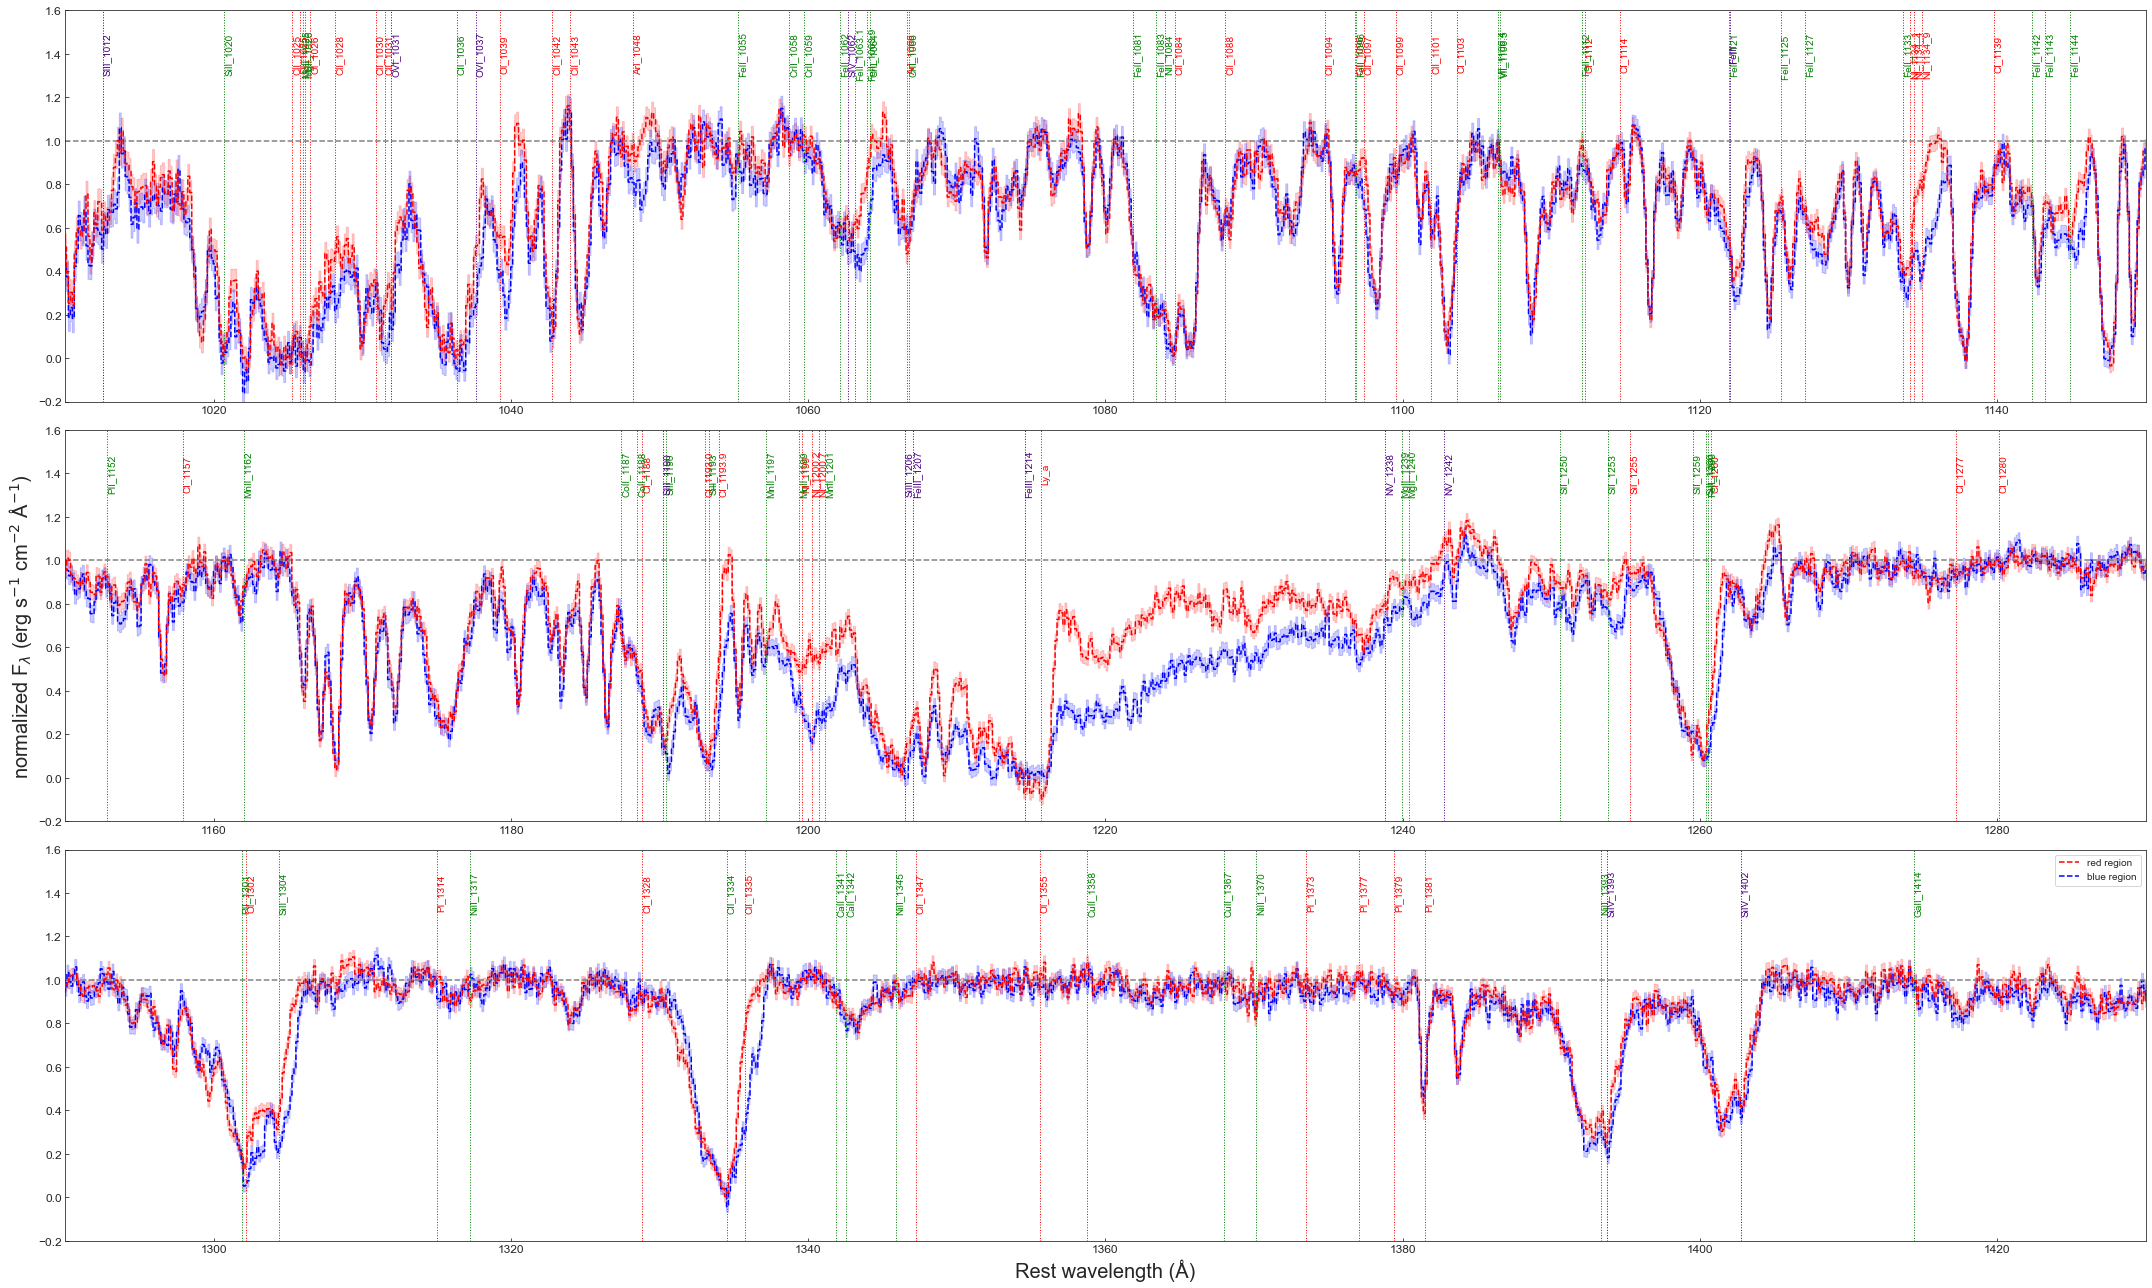

In [11]:
# data = ascii.read(files[0])
# wavelength = data["restwave"] * u.angstrom
# bflux = data["blueregion"] * u.erg / u.s / u.cm ** 2 / u.angstrom
# b_err = data["blue_err"] * u.erg / u.s / u.cm ** 2 / u.angstrom
# rflux = data["redregion"] * u.erg / u.s / u.cm ** 2 / u.angstrom
# r_err = data["red_err"] * u.erg / u.s / u.cm ** 2 / u.angstrom

norm_data = ascii.read(files[1])
nwavelength = norm_data["restwave"] * u.angstrom
bnorm = norm_data["bluenorm"] * u.erg / u.s / u.cm ** 2 / u.angstrom
bnorm_err = norm_data["blueerr"] * u.erg / u.s / u.cm ** 2 / u.angstrom
rnorm = norm_data["rednorm"] * u.erg / u.s / u.cm ** 2 / u.angstrom
rnorm_err = norm_data["rederr"] * u.erg / u.s / u.cm ** 2 / u.angstrom

fig = plt.figure(figsize=(30, 18),
#                  dpi=900
                )
ax1 = plt.subplot(311)
ax1.plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
ax1.fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
ax1.plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
ax1.fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
ax1.axhline(y=1, color='gray',ls = '--')
ax1.axis([1010,1150,-0.2,1.6])

ax2 = plt.subplot(312)
ax2.plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
ax2.fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
ax2.plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
ax2.fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
ax2.axhline(y=1, color='gray', ls = '--')
ax2.axis([1150,1290,-0.2,1.6])

ax3 = plt.subplot(313)
ax3.plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
ax3.fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
ax3.plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
ax3.fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
ax3.axhline(y=1, color='gray', ls = '--')
ax3.axis([1290,1430,-0.2,1.6])


plot_lines(ax1,ax2,ax3,1.4,'y')
plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax2.set_ylabel("normalized F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=20)

plt.tight_layout()
plt.legend()
# plt.savefig('improved.png')
plt.show()


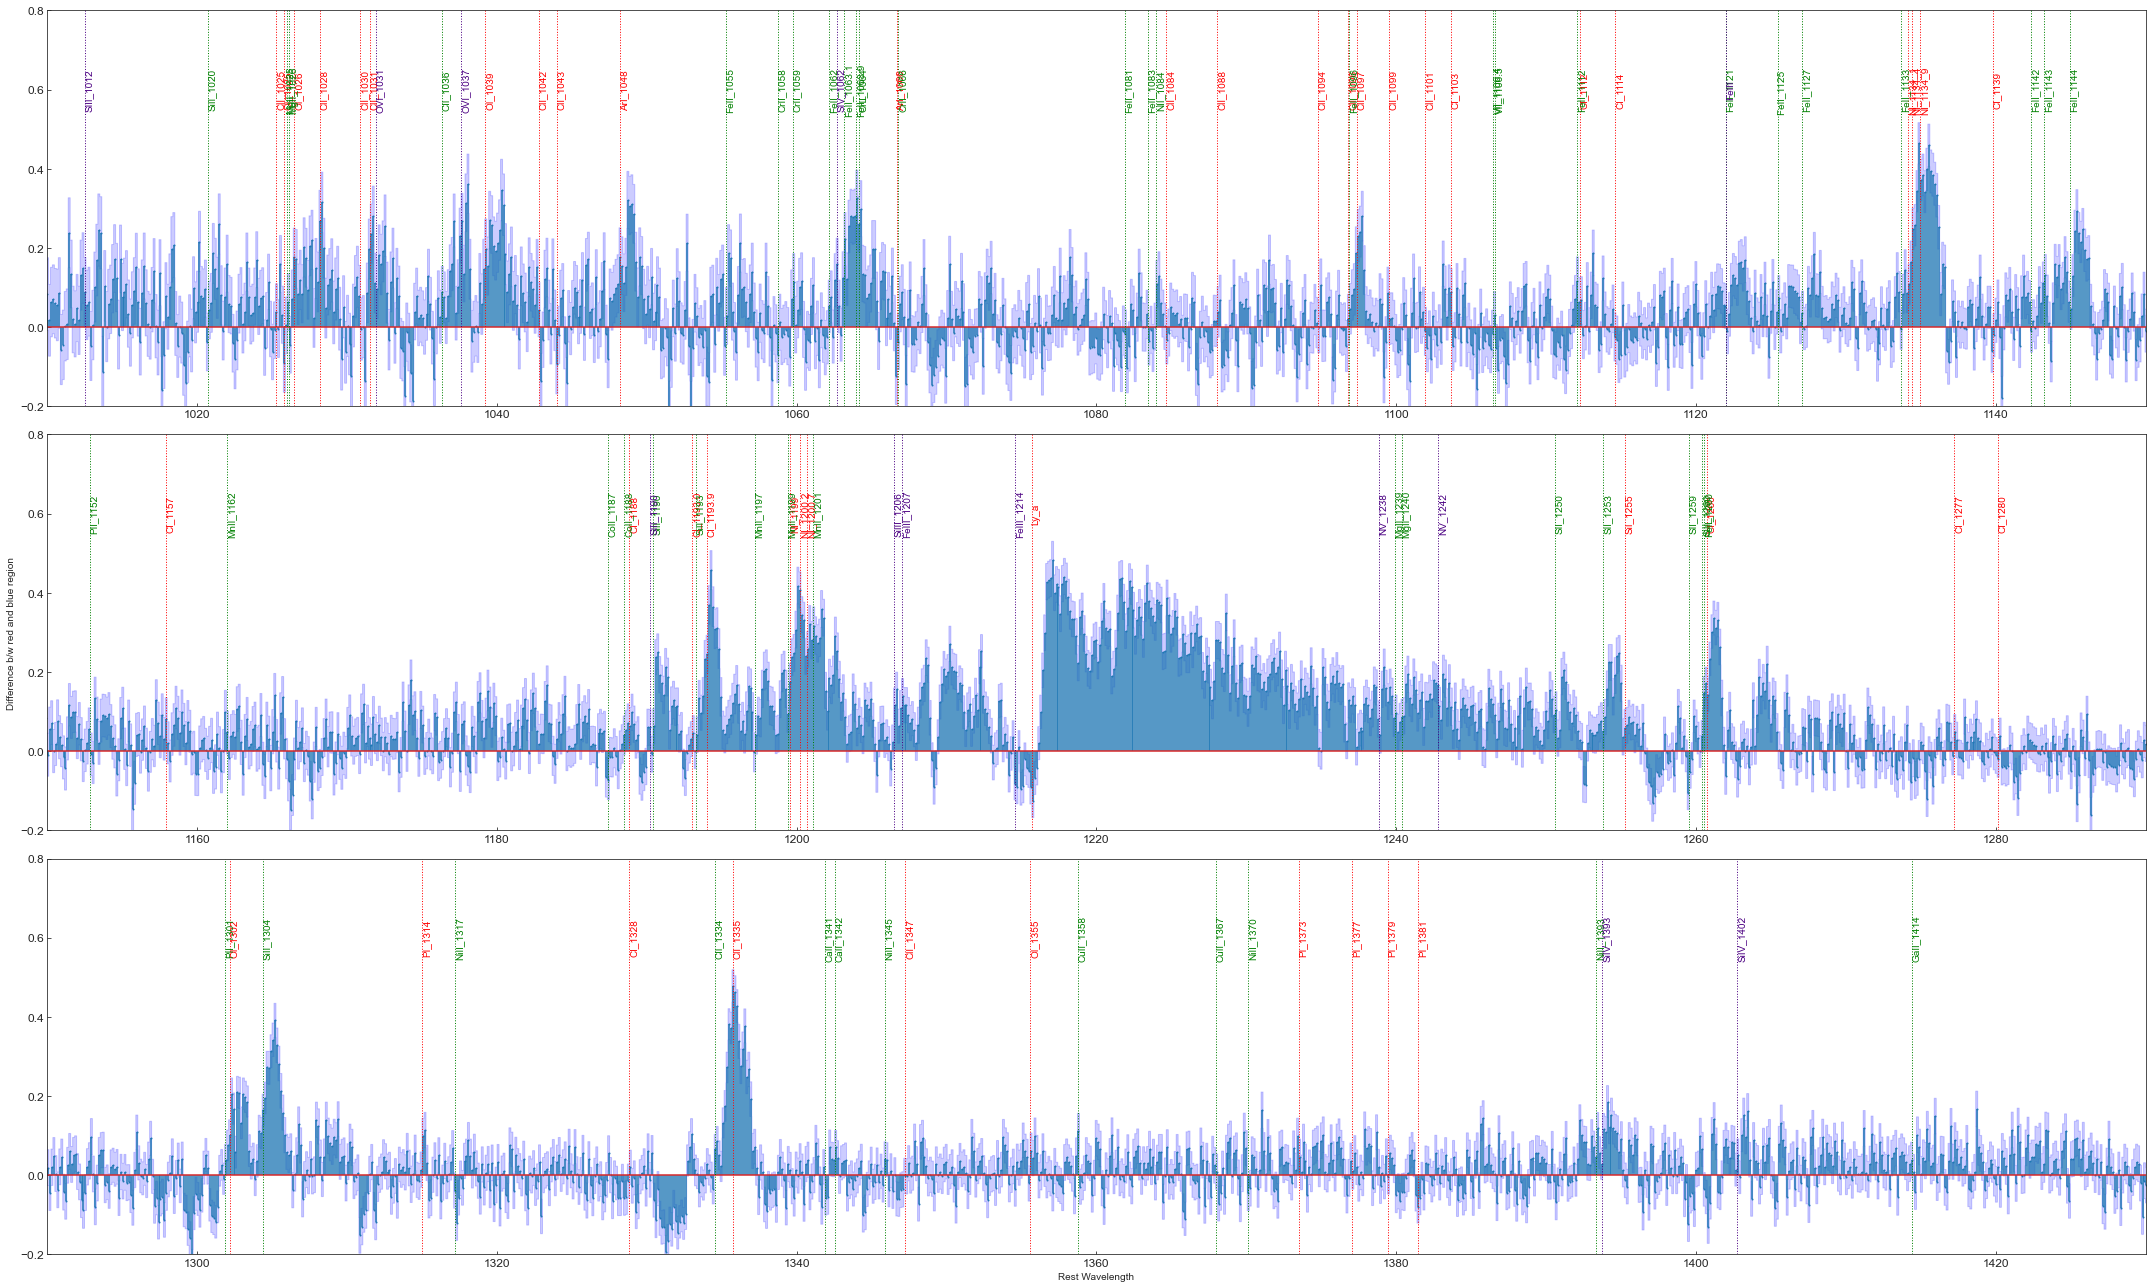

In [52]:
# z=x+y
# Var(z) = Var(x)+Var(y)
# sigma(z) = sqrt(sigma**2(x)+sigma**2(y))
errp = np.sqrt(rnorm_err**2+bnorm_err**2)

fig = plt.figure(figsize=(30, 18),
#                  dpi=900,
                )
ax1 = plt.subplot(311)
(markers, stemlines, baseline) = ax1.stem(nwavelength.value, rnorm-bnorm)
plt.setp(markers, markersize=1)
ax1.fill_between(nwavelength, rnorm-bnorm-errp, rnorm-bnorm+errp, step='mid', color=ap0color, alpha =0.2)
ax1.axis([1010,1150,-0.2,0.8])

ax2 = plt.subplot(312)
(markers, stemlines, baseline) = ax2.stem(nwavelength.value, rnorm-bnorm)
plt.setp(markers, markersize=1)
ax2.fill_between(nwavelength, rnorm-bnorm-errp, rnorm-bnorm+errp, step='mid', color=ap0color, alpha =0.2)
ax2.axis([1150,1290,-0.2,0.8])

ax3 = plt.subplot(313)
(markers, stemlines, baseline) = ax3.stem(nwavelength.value, rnorm-bnorm)
plt.setp(markers, markersize=1)
ax3.fill_between(nwavelength, rnorm-bnorm-errp, rnorm-bnorm+errp, step='mid', color=ap0color, alpha =0.2)
ax3.axis([1290,1430,-0.2,0.8])


plot_lines(ax1,ax2,ax3,0.6,'y')
plt.xlabel("Rest Wavelength")
ax2.set_ylabel("Difference b/w red and blue region")
plt.tight_layout()
# plt.legend()
# plt.savefig('diff_rb.png')
plt.show()

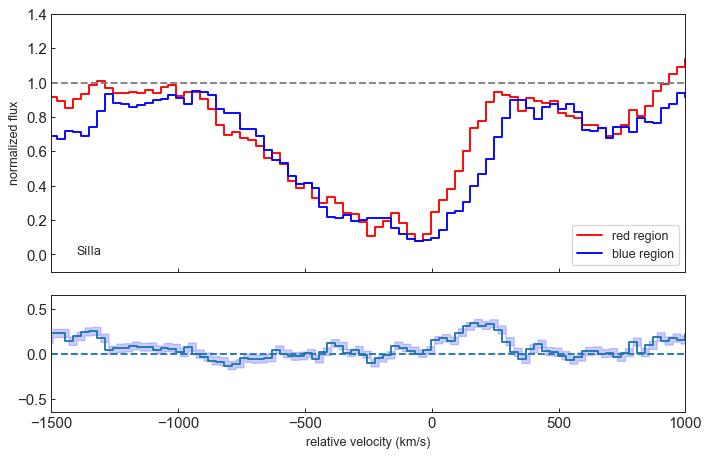

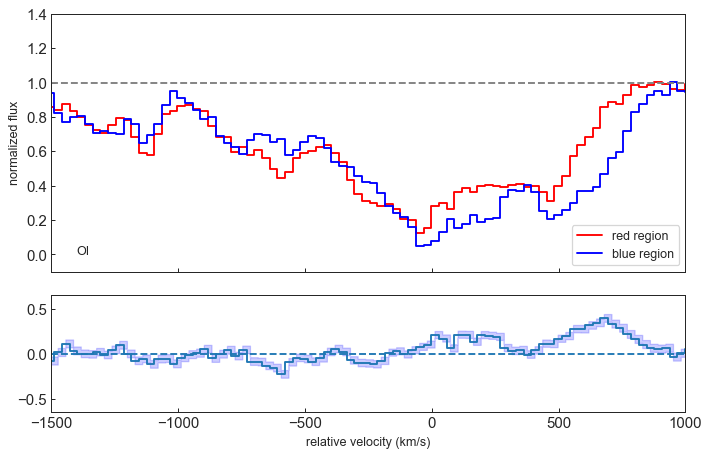

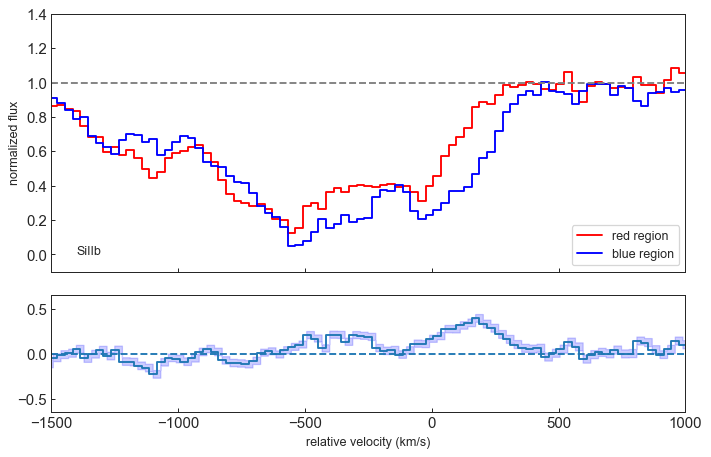

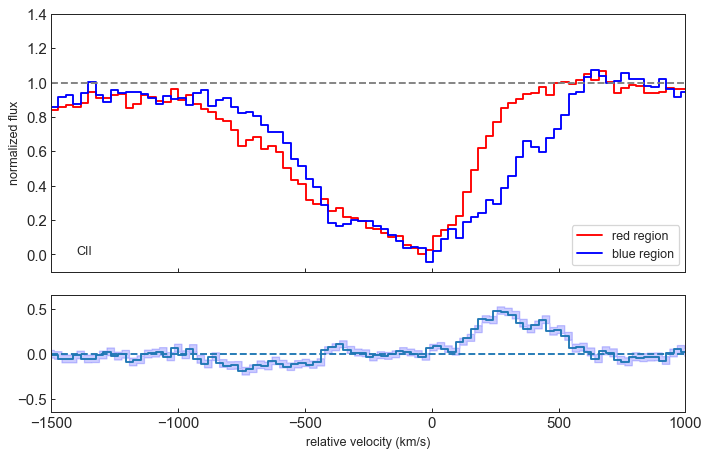

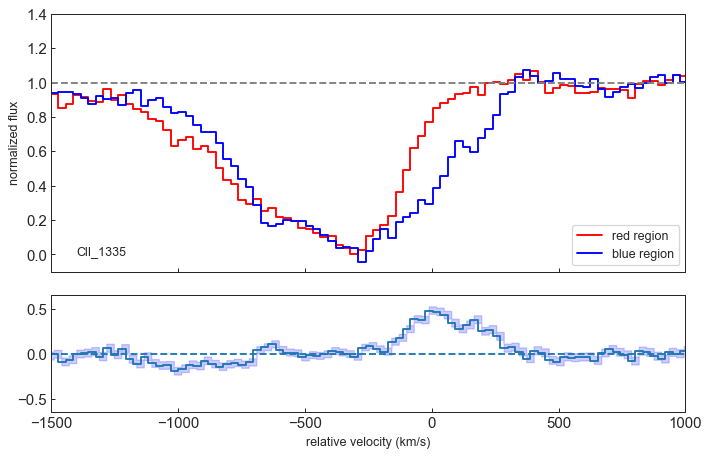

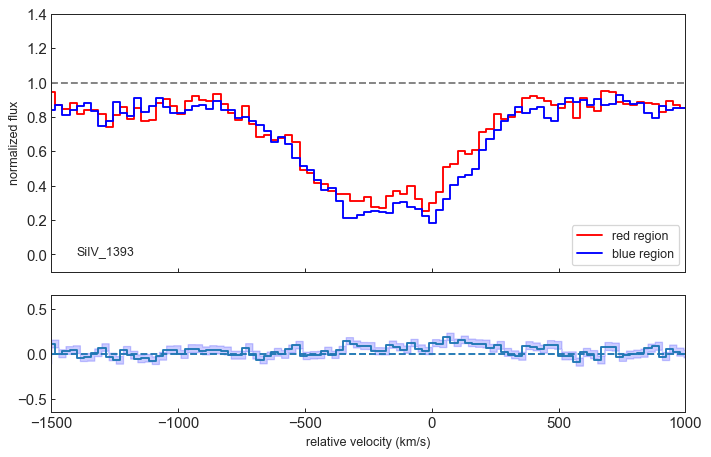

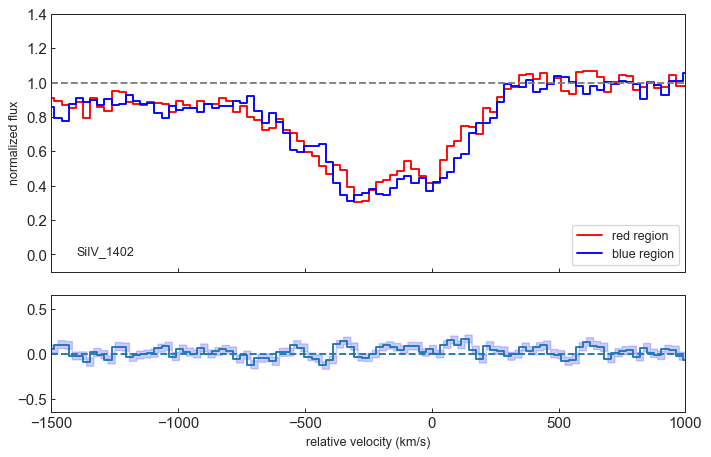

In [53]:
def vel_prof(spec1,spec2,absline):
        N = [] * u.km/u.s
        for i in nwavelength:
            N = np.append(N,(i - absline[1] * u.AA)/(absline[1] * u.AA)* c.c.to(u.km/u.s))
#         writing to file
#         --------------------------------------------------------------------
        f= open('velo.txt','w')
        f.write(str(N) + " " + str(spec1) + "\n")
        f.close()
#         velocity profile
#         --------------------------------------------------------------------        
        fig = plt.figure(figsize=(20,10),dpi=90)
        ax1 = plt.subplot2grid((5,2), (0,0), rowspan=2)
        plt.step(N,spec1,color='red',label = 'red region')  #spec1.quantity or spec2.quantity
        plt.step(N,spec2,color='blue',label = 'blue region')
        plt.axhline(1,ls = '--',color = 'grey')
        plt.ylim(-0.1,1.4)
        plt.xlim(-1500,1000)
        plt.ylabel('normalized flux')
        plt.text(-1400,1.1e-17,'%s'%absline[0])
        plt.legend(loc="lower right")
#         difference b/w rnorm and bnorm w/ error
#         --------------------------------------------------------------------
        ax2 = plt.subplot2grid((5,2), (2,0))
#         (markers, stemlines, baseline) = plt.stem(N.value, rnorm-bnorm)
#         plt.setp(markers, markersize=0.2)
        ax2.step(N, rnorm-bnorm,alpha=1)
        plt.axhline(y=0,ls='--')
        plt.fill_between(N, rnorm-bnorm-errp, rnorm-bnorm+errp, step='mid', color=ap0color, alpha =0.2)
        plt.ylim(-0.65,0.65)
        plt.xlim(-1500,1000)
        ax1.get_shared_x_axes().join(ax1, ax2)
        ax1.set_xticklabels([])
        plt.xlabel('relative velocity (km/s)')
        plt.savefig('velprof_%f.png'%absline[1])
        plt.show()

for j in abslines.items():
    vel_prof(rnorm,bnorm,j)

In [14]:
def avg_prof(spec1,absline):
    N = [] * u.km/u.s
    for i in nwavelength:
        N = np.append(N,(i - absline * u.AA)/(absline * u.AA)* c.c.to(u.km/u.s))
    plt.step(N,spec1,lw = 0.5,color='gray',label = 'red region')  #spec1.quantity or spec2.quantity

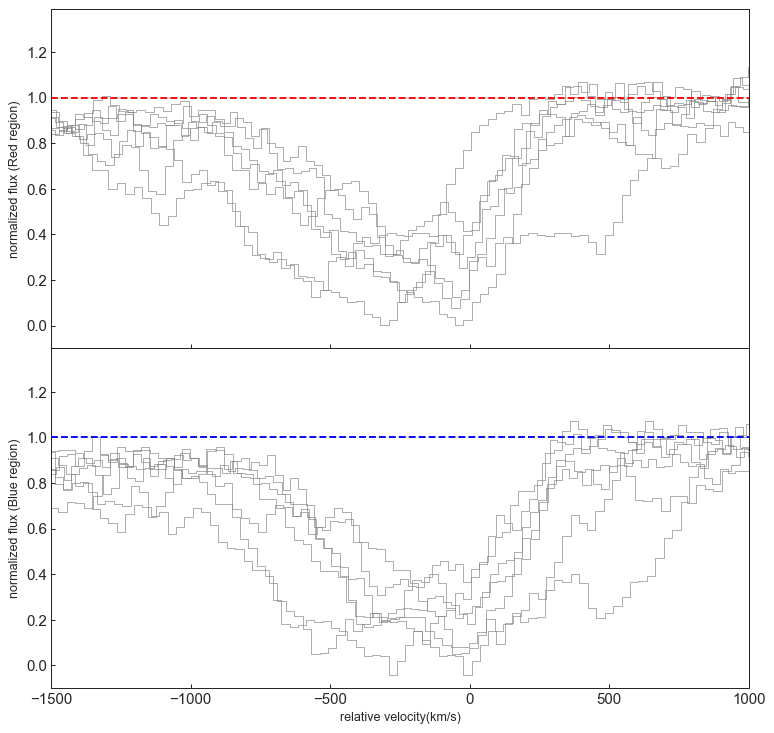

In [54]:
fig = plt.figure(figsize=(10,10),dpi=90)
ax1=plt.subplot(211)
for j in list(abslines.items()):
    avg_prof(rnorm,j[1])
ax1.axhline(1,ls = '--',color = 'red')
ax1.set_ylim(-0.1,1.39)
ax1.set_xlim(-1500,1000)
ax1.set_ylabel('normalized flux (Red region)')
# ax1.title('Red region')

ax2 = plt.subplot(212)
for j in list(abslines.items()):
    avg_prof(bnorm,j[1])
ax2.axhline(1,ls = '--',color = 'blue')
ax2.set_ylim(-0.1,1.39)
ax2.set_xlim(-1500,1000)
ax2.set_ylabel('normalized flux (Blue region)')
ax2.set_xlabel('relative velocity(km/s)')

ax1.set_xticklabels([])
plt.subplots_adjust(hspace=0)
# plt.title('Blue region')
plt.savefig('avg_prof.png')
plt.show()

In [20]:
def fit_continuum(n_windows, wave, flux):
    wave_to_fit = np.zeros(n_windows) * wave.unit
    flux_to_fit = np.zeros(n_windows) * flux.unit

    for i in range(n_windows):
        if windows[i][0] > min(wave.value):
            waves = wave[(wave.value > windows[i][0]) & (wave.value < windows[i][1])]
            fluxes = flux[(wave.value > windows[i][0]) & (wave.value < windows[i][1])]
            wave_to_fit[i] = np.mean(waves)
            flux_to_fit[i] = np.median(fluxes)

    waverange = (wave.value > wave_to_fit[0].value) & (
        wave.value < wave_to_fit[-1].value
    )
    # fit spline to median fluxes in windows
    contfunc = interp1d(wave_to_fit, flux_to_fit, kind="cubic")
    contfit = contfunc(wave[waverange])
    norm = flux[waverange] / contfit
    return (waverange, wave_to_fit, flux_to_fit, contfit, norm)
# define function that will find index of pixel with
# nearest wavelength to rest wavelength
def find_nearest(array, value):
    index = (np.abs(array - value)).argmin()
    return index
def measure_absline(wave, flux, line):
    """
	ew=measure_ew(wave, flux, line)
	returns the equivalent width (in the same units as "wave"),
	equivalent width-weighted velocity, maximum blueshifted velocity
	for the absorption line closest in wavelength to "line"
	"""
    # no units
    wave = wave.value
    flux = flux.value
    disp = np.mean(np.diff(wave))
    

    vmin = -1000 * u.km / u.s
    vmax = 500 * u.km / u.s
    
    down = (vmin/c.c.to(u.km/u.s) + 1) * line * u.AA
    up = (vmax/c.c.to(u.km/u.s) + 1) * line * u.AA
    downindex = np.abs(wave-down.value)
    downer = int(np.where(downindex == downindex.min())[0])
    upindex = np.abs(wave-up.value)
    upper = int(np.where(upindex == upindex.min())[0])
    
    #-----------------------------------------------------------------------------
    #to calculate equivalent width, subtract total flux from continuum
    # and multiply by dispersion
    # we want to integrate the area between the line and the continuum level
    # flux has units of erg/s/cm^2/angstrom
    # so we need to add up the fluxes and multiply by angstroms/pixel
    # velocities are in km/s
    
    ew = disp * np.sum(1 - flux[downer:upper])
    cent = np.sum(disp * (1 - flux[downer:upper]) * wave[downer:upper]) / ew
    vel = (cent - line) / line * c.c.to(u.km / u.s)
    maxvel = (wave[downer] - line) / line * c.c.to(u.km / u.s)
    # absorption line EWs are negative
    ew = ew * u.angstrom
#     print("%0.3f at %f"%(ew.value,line))
#     print(ew,line)
    return ew, vel, maxvel, wave[downer], wave[upper]

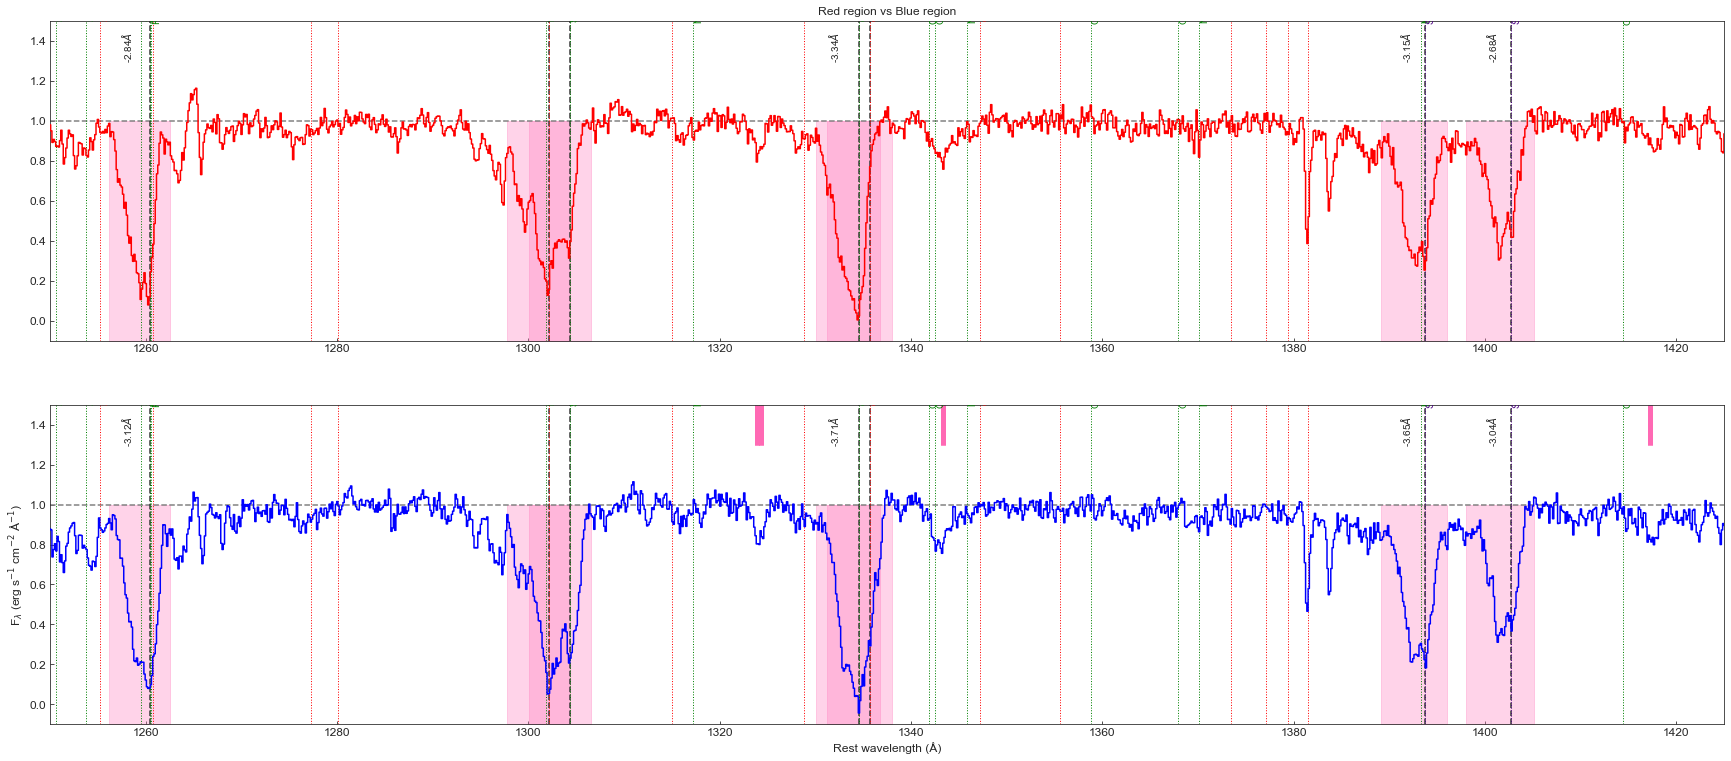

In [49]:
lines_to_measure = list(abslines.values())
#     lines_to_measure = list(bluelines.values())

# results of direct integration
ew = np.zeros(len(lines_to_measure)) * u.angstrom
minwave = np.zeros(len(lines_to_measure))
maxwave = np.zeros(len(lines_to_measure))
vel = np.zeros(len(lines_to_measure)) * u.km / u.s
maxvel = np.zeros(len(lines_to_measure)) * u.km / u.s
for j in range(len(lines_to_measure)):
    linewave = lines_to_measure[j]
    # direct integration
    ew[j], vel[j], maxvel[j], minwave[j], maxwave[j] = measure_absline(
        nwavelength, rnorm, linewave    #change to wavelength or bwavelength or rwavelength
    )
    #print(vel,maxvel)

minwave = minwave * u.AA
maxwave = maxwave * u.AA

plt.figure(num=1, figsize=(30, 20))
plt.clf()

ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax1.set_title('Red region vs Blue region')
# ax1.plot(nwavelength, rnorm, color=ap1color, drawstyle="steps-mid")
ax1.plot(nwavelength, rnorm, color=ap1color, drawstyle="steps-mid", zorder=3)
ax1.axhline(1, color="grey", linestyle="--", zorder=1)

ax1.set_xlim([1250, 1425])
#     ax2.set_xlim([1050, 1170])
ax1.set_ylim([-0.1,1.5])
for line in lines_to_measure:
    ax1.axvline(line, color="xkcd:dark grey", linestyle="--", zorder=2)
for blueline in list(bluelines.values()):
    ax1.axvline(blueline, color="xkcd:deep sky blue", linestyle="--", zorder=2)
for lymanline in lymanlinelist:
    ax1.axvline(lymanline, color="xkcd:faded red", linestyle="--", zorder=2)
for intervening_line in foreground_lymanlines:
    ax1.axvline(intervening_line, color="xkcd:medium green", linestyle="--", zorder=2)

for j in range(len(minwave)):
    ax1.fill_between(
        [minwave[j].value, maxwave[j].value],
        [-0.1, -0.1],
        y2=[1, 1],
        color=sns.xkcd_rgb["pink"],
        alpha=0.35,
        zorder=1,
    )
ax1.text(1258, 1.3, r'%0.2f$\AA$'%-ew[0].value, {'ha': 'center'}, rotation=90)
ax1.text(1332, 1.3, r'%0.2f$\AA$'%-ew[3].value, {'ha': 'center'}, rotation=90)
ax1.text(1391.7602, 1.3, r'%0.2f$\AA$'%-ew[4].value, {'ha': 'center'}, rotation=90)
ax1.text(1400.7729, 1.3, r'%0.2f$\AA$'%-ew[5].value, {'ha': 'center'}, rotation=90)
# for line in all_lines_wave:
#     ax1.axvline(line, color="silver", linestyle=":", zorder=1)
lines_to_measure = list(abslines.values())
#     lines_to_measure = list(bluelines.values())

# results of direct integration
ew = np.zeros(len(lines_to_measure)) * u.angstrom
minwave = np.zeros(len(lines_to_measure))
maxwave = np.zeros(len(lines_to_measure))
vel = np.zeros(len(lines_to_measure)) * u.km / u.s
maxvel = np.zeros(len(lines_to_measure)) * u.km / u.s
for j in range(len(lines_to_measure)):
    linewave = lines_to_measure[j]
    # direct integration
    ew[j], vel[j], maxvel[j], minwave[j], maxwave[j] = measure_absline(
        nwavelength, bnorm, linewave    #change to wavelength or bwavelength or rwavelength
    )
    #print(vel,maxvel)

minwave = minwave * u.AA
maxwave = maxwave * u.AA

# ax2.set_title(title[0])
ax2.plot(nwavelength, bnorm, color=ap0color, drawstyle="steps-mid", zorder=3)
ax2.axhline(1, color="grey", linestyle="--", zorder=1)
for line in lines_to_measure:
    ax2.axvline(line, color="xkcd:dark grey", linestyle="--", zorder=2)
ax2.vlines(x=[1247.38,1323.93,1324.31,1343.35,1417.24,1501.76,1718.55] * u.AA, ymin=1.3, ymax=1.5, colors='hotpink', ls='-', lw=5, label='Photospheric')

ax2.set_xlim([1250, 1425])
#     ax2.set_xlim([1050, 1170])
ax2.set_ylim([-0.1,1.5])
for j in range(len(minwave)):
    ax2.fill_between(
        [minwave[j].value, maxwave[j].value],
        [-0.1, -0.1],
        y2=[1, 1],
        color=sns.xkcd_rgb["pink"],
        alpha=0.35,
        zorder=1,
    )
ax2.text(1258, 1.3, r'%0.2f$\AA$'%-ew[0].value, {'ha': 'center'}, rotation=90)
ax2.text(1332, 1.3, r'%0.2f$\AA$'%-ew[3].value, {'ha': 'center'}, rotation=90)
ax2.text(1391.7602, 1.3, r'%0.2f$\AA$'%-ew[4].value, {'ha': 'center'}, rotation=90)
ax2.text(1400.7729, 1.3, r'%0.2f$\AA$'%-ew[5].value, {'ha': 'center'}, rotation=90)
ax2.vlines(x=[1247.38,1323.93,1324.31,1343.35,1417.24,1501.76,1718.55] * u.AA, ymin=1.3, ymax=1.5, colors='hotpink', ls='-', lw=5, label='Photospheric')

plt.xlabel("Rest wavelength (Å)", fontsize=fontsize)
plt.ylabel("F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=fontsize)
plot_lines(ax1,ax2,ax3,1.6,'y')
plt.savefig('equ_width.png')
# plt.legend()
plt.show()


In [105]:
def ew_a(spec,err,n_iter):
    
    ew = np.zeros(len(lines_to_measure)) * u.angstrom
    minwave = np.zeros(len(lines_to_measure))
    maxwave = np.zeros(len(lines_to_measure))
    vel = np.zeros(len(lines_to_measure)) * u.km / u.s
    maxvel = np.zeros(len(lines_to_measure)) * u.km / u.s
    ew1 = np.zeros((n_iter,len(lines_to_measure)))
    rnorm_new = np.empty(len(rnorm)) * rnorm.unit
    for n in range(n_iter):
        spec_new = spec + np.random.normal(0,err.value,len(err)) * err.unit
        for j in range(len(lines_to_measure)):
            linewave = lines_to_measure[j]
            # direct integration
            ew[j], vel[j], maxvel[j], minwave[j], maxwave[j] = measure_absline(nwavelength, spec_new, linewave)
        ew1[n] = ew
    del_ew = np.std(ew1,axis=0) * ew.unit
    m_ew = np.mean(ew1,axis=0) * ew.unit
    print("-----------------------------------------------------")
    for i in range(len(lines_to_measure)):
        print('EW for', (list(abslines.items())[i]), 'is', f"{m_ew.value[i]:0.3f}",'+/-',f"{del_ew[i]:0.3f}")
    print("-----------------------------------------------------")

In [106]:
ew_a(rnorm,rnorm_err,500)
ew_a(bnorm,bnorm_err,500)

#need to report one cumul value for closely spaced abs lines. CII,ClI & OI,SiIIb

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 2.838 +/- 0.025 Angstrom
EW for ('OI', 1302.1685) is 3.469 +/- 0.025 Angstrom
EW for ('SiIIb', 1304.3702) is 3.125 +/- 0.026 Angstrom
EW for ('CII', 1334.5323) is 3.340 +/- 0.025 Angstrom
EW for ('ClI_1335', 1335.7258) is 3.148 +/- 0.026 Angstrom
EW for ('SiIV_1393', 1393.755) is 2.684 +/- 0.028 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.118 +/- 0.030 Angstrom
-----------------------------------------------------
-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 3.124 +/- 0.030 Angstrom
EW for ('OI', 1302.1685) is 3.550 +/- 0.029 Angstrom
EW for ('SiIIb', 1304.3702) is 3.749 +/- 0.029 Angstrom
EW for ('CII', 1334.5323) is 3.708 +/- 0.027 Angstrom
EW for ('ClI_1335', 1335.7258) is 3.648 +/- 0.028 Angstrom
EW for ('SiIV_1393', 1393.755) is 3.040 +/- 0.029 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.294 +/- 0.029 Angstrom
------------------------------------------------